In [2]:
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# repo_slug,total_commits,week,week_next
commits = pd.read_csv("commits.csv", parse_dates=['week', 'week_next'])
commits['year'] = commits['week'].dt.year
commits['month'] = commits['week'].dt.strftime('%B')
commits['month_num'] = commits['week'].dt.month

# Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,Watchers,Language,License,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
repositories = pd.read_csv("repositories.csv", parse_dates=['Created At', 'Updated At'])
repositories['Slug'] = repositories['URL'].apply(lambda x: x.removeprefix('https://github.com/').removesuffix('/'))
repositories['Topics'] = repositories['Topics'].apply(literal_eval).apply(tuple)

<Axes: title={'center': 'Top 10 Repos by Commits'}, ylabel='repo_slug'>

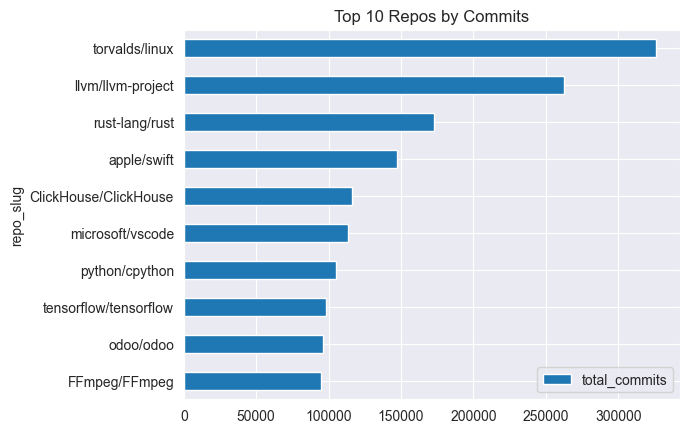

In [3]:
commits.groupby('repo_slug').sum('total_commits').sort_values('total_commits', ascending=False).head(10).sort_values(by='total_commits', ascending=True).plot(kind='barh', y='total_commits', title='Top 10 Repos by Commits')

<Axes: title={'center': 'Commits by Year'}, xlabel='year'>

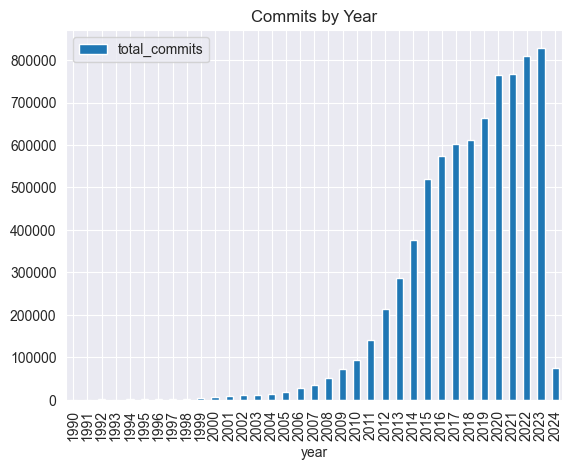

In [4]:
# group by year
commits.groupby('year').sum('total_commits').plot(kind='bar', y='total_commits', title='Commits by Year')

<Axes: title={'center': 'Commits by Month'}, ylabel='month'>

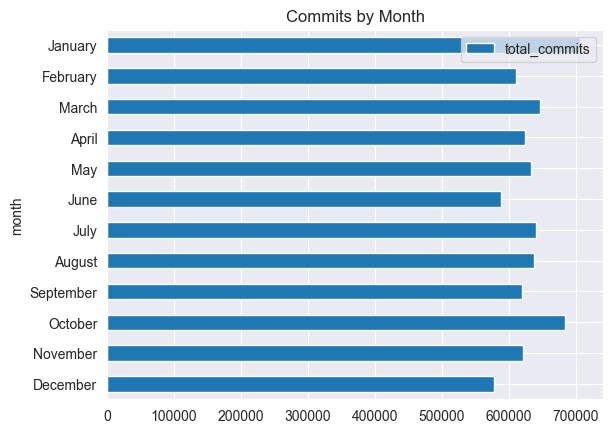

In [5]:
# group by month named
commits.groupby('month').sum('total_commits').sort_values('month_num', ascending=False).plot(kind='barh', y='total_commits', title='Commits by Month')

<Axes: title={'center': 'Top 12 Repos by Year'}, xlabel='year'>

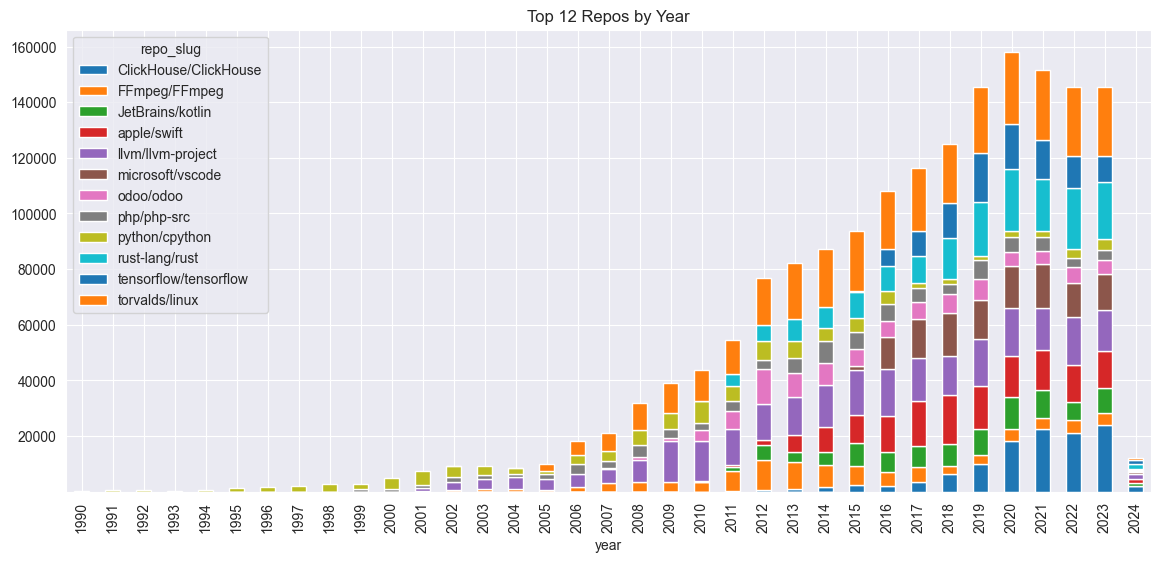

In [6]:
# get most 10 commited repos
top_10_langs_repos = commits.groupby('repo_slug').sum('total_commits').sort_values('total_commits', ascending=False).head(12).index
# then gruop by year and repo stacked
commits[commits['repo_slug'].isin(top_10_langs_repos)].groupby(['year', 'repo_slug']).sum('total_commits').unstack().plot(kind='bar', y='total_commits', stacked=True, title='Top 12 Repos by Year', figsize=(14, 6))

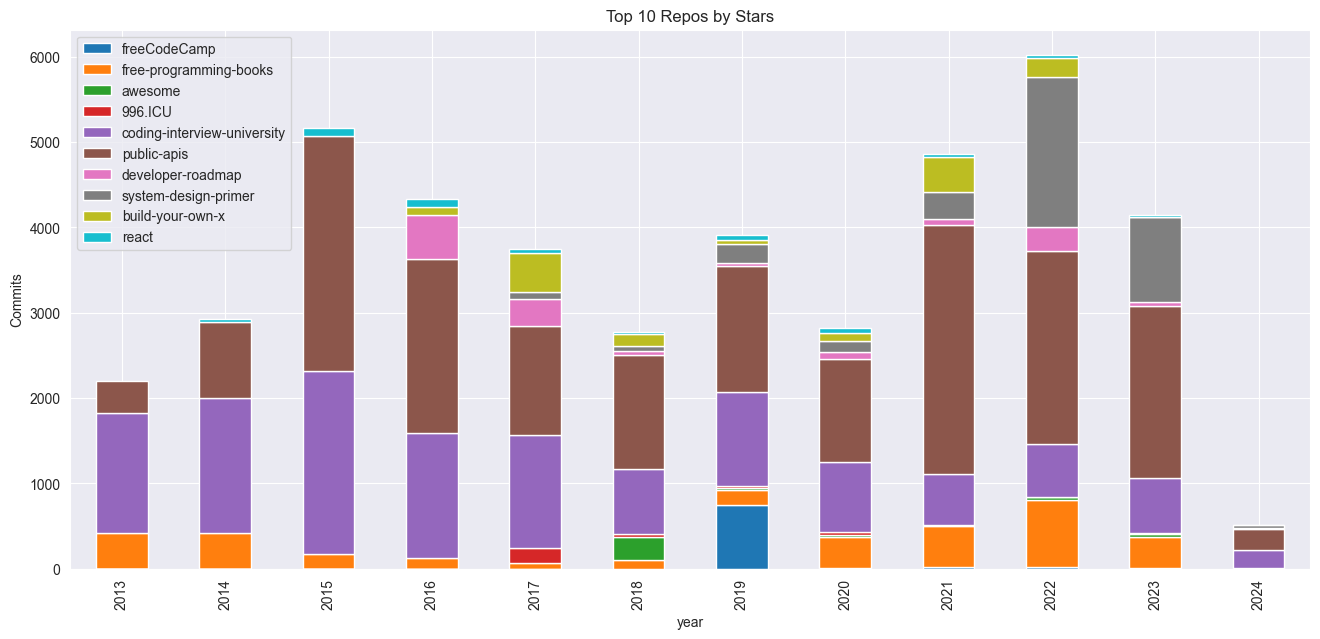

In [7]:
top_10_repos_stars = repositories.sort_values('Stars', ascending=False).head(10)
top_10_repos_stars_commits = commits[commits['repo_slug'].isin(top_10_repos_stars['Slug'])]
ax = top_10_repos_stars_commits.groupby(['year', 'repo_slug']).sum('total_commits').unstack().plot(kind='bar', y='total_commits', stacked=True, title='Top 10 Repos by Stars', figsize=(16, 7))
ax.set_ylabel('Commits')
ax.legend(top_10_repos_stars['Name'])

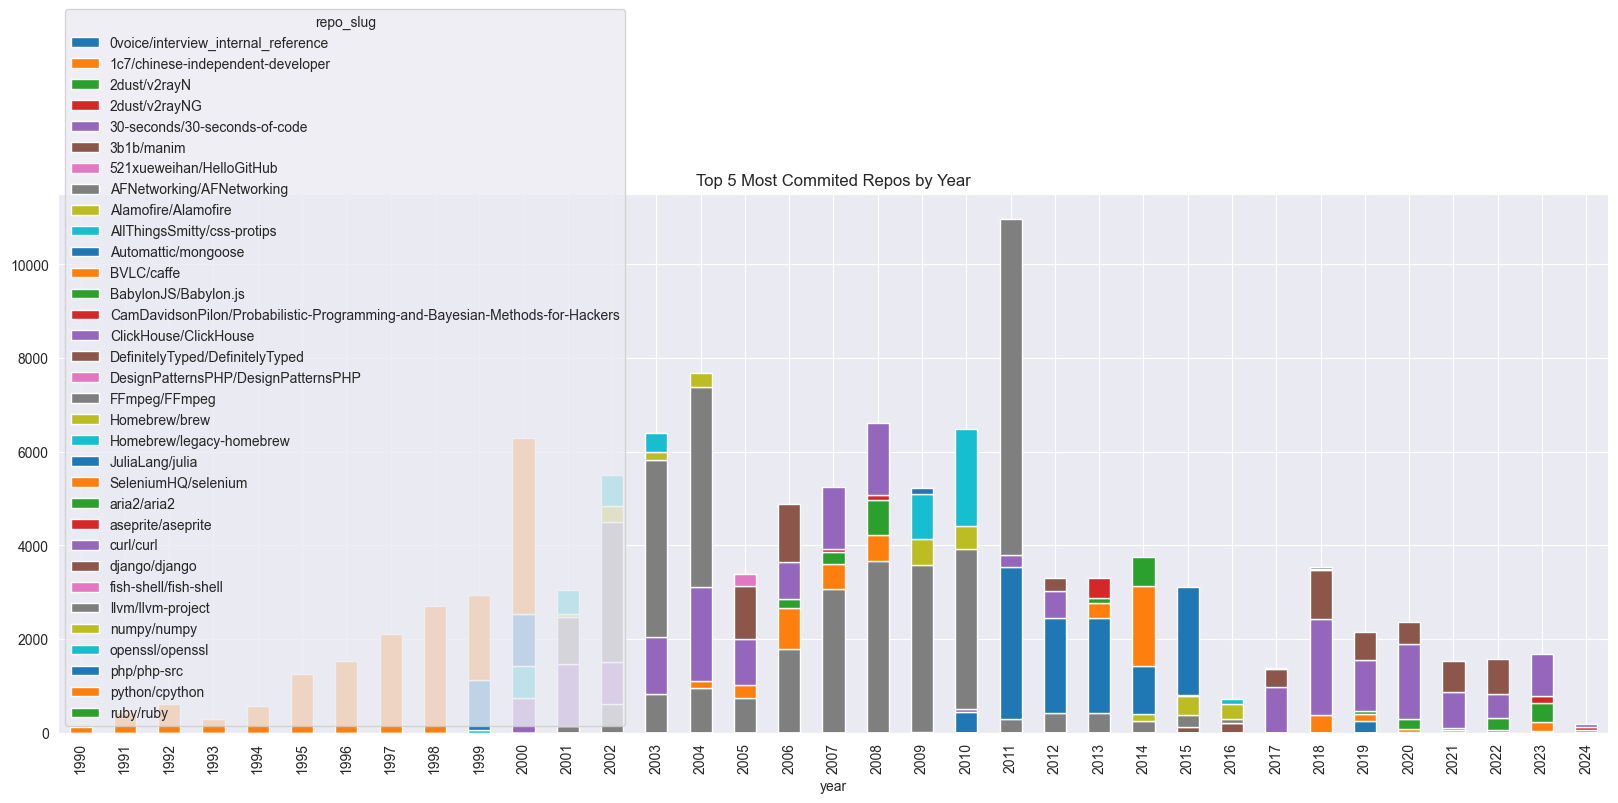

In [8]:
# Get 5 most commited each year
top_5_repos = commits.groupby(['year', 'repo_slug']).sum('total_commits').groupby('year').head(5).reset_index()
top_5_repos = top_5_repos.groupby(['year', 'repo_slug']).sum('total_commits').unstack().plot(kind='bar', y='total_commits', stacked=True, title='Top 5 Most Commited Repos by Year', figsize=(20, 7))

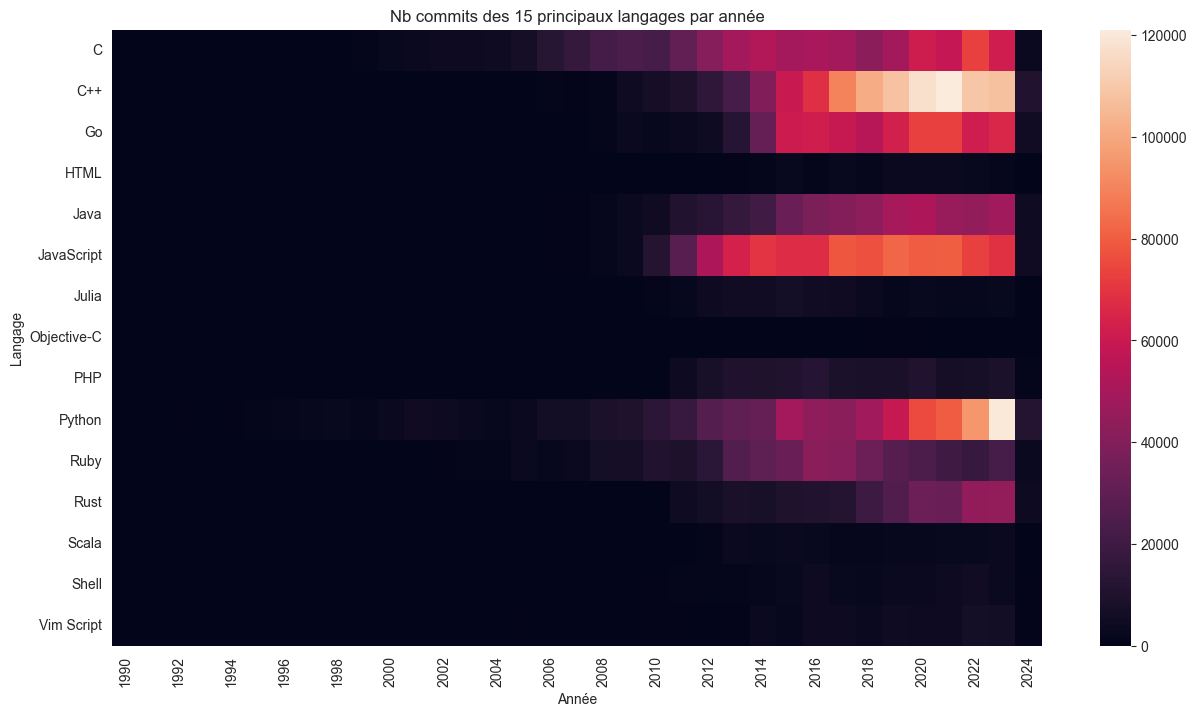

In [80]:
# Jointure sur repo_slug
df = commits.merge(repositories[['repo_slug', 'Language']], on='repo_slug')

# Groupby et pivot table
commits_lang = df.groupby(['Language', df['week'].dt.year])['total_commits'].sum().reset_index()

# Trier et prendre les 15 premiers langages
top_langs = commits_lang['Language'].value_counts().index[:15]
commits_lang = commits_lang[commits_lang['Language'].isin(top_langs)]
commits_lang = commits_lang.sort_values(by='total_commits', ascending=False)

pivot = commits_lang.pivot_table(index='Language', columns='week', values='total_commits', aggfunc='sum')
pivot = pivot.fillna(0)

# Heatmap
ax = sns.heatmap(pivot, annot=False)
ax.set_title('Nb commits des 15 principaux langages par année')
ax.set_xlabel('Année')
ax.set_ylabel('Langage')

# Set size
fig = plt.gcf()
fig.set_size_inches(15, 8)

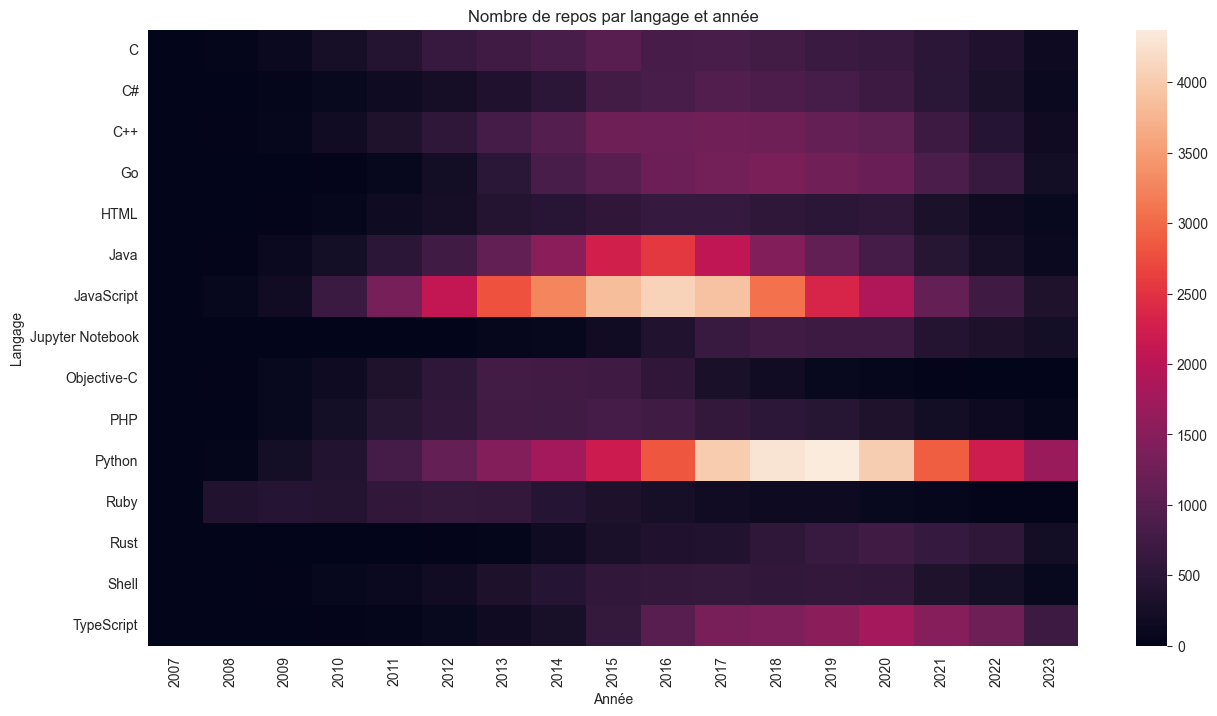

In [77]:
# Créer une pivot table avec les comptages de repos par langage et année

top_langs = repositories['Language'].value_counts().index[:15]
top_repos = repositories[repositories['Language'].isin(top_langs)]
pivot = top_repos.pivot_table(index='Language', columns=top_repos['Created At'].dt.year, values='Name', aggfunc='count')

# Remplacer les valeurs manquantes par 0  
pivot = pivot.fillna(0)

# Générer la heatmap
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(pivot, annot=False)
ax.set_title('Nombre de repos par langage et année')
ax.set_xlabel('Année')
ax.set_ylabel('Langage')

# Set size
fig = plt.gcf()
fig.set_size_inches(15, 8)